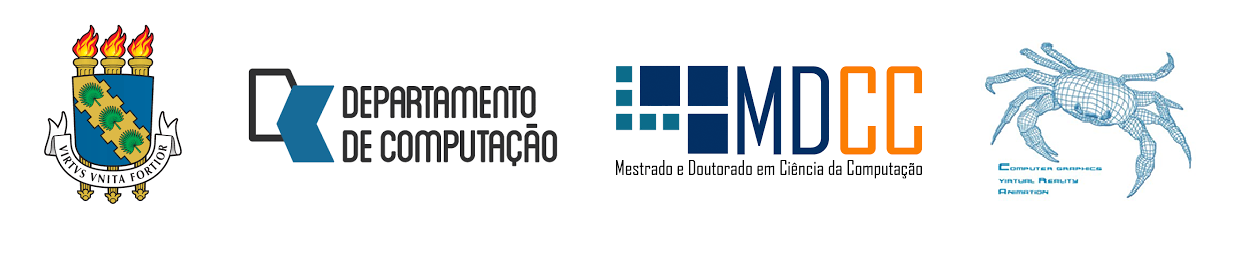

# Intro about IGL with triangular meshes
### by Gustavo Mota

Based on the following tutorial YouTube [source video](https://www.youtube.com/watch?v=PlmFUQCL_ok&ab_channel=ZhongshiJiang) and [source video](https://www.youtube.com/watch?v=E-SosgBIj9o&list=TLPQMzAwMzIwMjKS-EVhAzB0Rg&index=2&ab_channel=ZhongshiJiang) (Last watched: 29/03/2022)

Sample files found on LIBIGL [GitHub](https://github.com/libigl/libigl-tutorial-data)

Master student at MDCC - Mestrado e Doutorado em Ciência da Computação program at Federal University of Ceará.

In [1]:
import igl
import meshplot as mp
import scipy as sp
import numpy as np
import os
import plotly.graph_objects as go
from scipy.sparse.linalg import spsolve as solve
import ipywidgets as iw

In [2]:
v = np.array([
    [0., 0, 0],
    [1, 0, 0],
    [1,1,1],
    [2,1,0]
])

f = np.array([
    [0,1,2],
    [1,3,2]
])

mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.0, 0.5,…

# Basic IO

In [3]:
root_folder = os.getcwd()

In [4]:
# V é um array de vértices: cada posição uma coord X, Y ou Z
# F é um array de faces: cada posição um índice de ponto em V
v, f = igl.read_triangle_mesh(os.path.join(root_folder, "data", "bunny_small.off"))
mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [5]:
igl.read_triangle_mesh?

In [6]:
v, f

(array([[-0.0260146 ,  0.112578  ,  0.0363871 ],
        [-0.0321783 ,  0.174119  , -0.00263321],
        [-0.080718  ,  0.152855  ,  0.0302446 ],
        ...,
        [-0.023099  ,  0.156978  , -0.00584018],
        [-0.0713101 ,  0.15068   , -0.0435721 ],
        [-0.0396435 ,  0.152397  , -0.00721968]]),
 array([[2784, 2497, 2027],
        [1077,  225, 1060],
        [ 425,  450,  381],
        ...,
        [3086, 3203, 3162],
        [3086, 3162, 3151],
        [3086, 3151, 3085]], dtype=int32))

In [7]:
# C = cor: defina-o para 0,1 ou 2 p/ intensidade corresponder à distância do ponto ao eixo X, Y ou Z 
mp.plot(v, f, c=v[:, 1])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [8]:
bc = igl.barycenter(v, f) # centro do objeto
mp.plot(v, f[bc[:, 0] > 0], c=v[:, 0])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [9]:
mp.plot(v, f[bc[:, 0] < 0], c=v[:, 0])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [10]:
mp.plot(v, f[bc[:, 0] + bc[:, 1] < 0.1], c=v[:, 0])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

# Vector Field Visualization

In [11]:
nf = igl.per_face_normals(v, f, np.zeros(3))
p = mp.plot(v, f+nf)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [12]:
nf = igl.per_face_normals(v, f, np.zeros(3))
p = mp.plot(v, f, return_plot=True)
p.add_lines(bc, bc+ 0.01*nf)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

1

In [13]:
pd1, pd2, pv1, pv2 = igl.principal_curvature(v, f)
for i in (pd1, pd2):
    p = mp.plot(v, f, return_plot=True)
    p.add_lines(v, v+5e-3*i)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [14]:
p.save("s1")

Plot saved to file s1.html.


# Mesh Statistics

In [15]:
igl.is_edge_manifold(f)
irr = igl.is_irregular_vertex(v, f)
np.count_nonzero(irr)/len(irr)

0.6137733142037303

In [16]:
dar = igl.doublearea(v,f )

In [17]:
go.Figure([go.Histogram(x=dar)])

In [18]:
intang = igl.internal_angles(v, f)
intang.shape, f.shape

((6966, 3), (6966, 3))

In [19]:
go.Figure([go.Histogram(x=intang.flatten()/np.pi*180)])

In [20]:
p.add_points?

In [21]:
p = mp.plot(v, f, return_plot=True, shading = dict(wireframe=True,point_size=50))

p.add_points(v[f[6962]])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

1

## Texture Maping (Harmonic Parametrization)

In [22]:
v, f = igl.read_triangle_mesh(os.path.join(root_folder, "data", "camelhead.off"))
mp.plot(v, f)

p = mp.plot(v, f, return_plot=True, shading = dict(wireframe=True,point_size=50))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.9967555…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.9967555…

In [23]:
bnd = igl.boundary_loop(f)
p = mp.plot(v, f, return_plot=True)
p.add_points(v[bnd], shading=dict(point_size=0.1))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.9967555…

1

In [24]:
bnd_uv = igl.map_vertices_to_circle(v, bnd)
mp.plot(bnd_uv, shading=dict(point_size=0.1))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(2.3782253…

In [25]:
uv = igl.harmonic_weights(v, f, bnd, bnd_uv, k=1) #computes k-harmonic weight functions "coordinates"
mp.plot(uv)
mp.plot(uv, f, shading=dict(wireframe=True))
mp.plot(v, f, uv=uv, shading=dict(wireframe=True))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(2.3782253…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(2.3782253…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.9967555…

In [26]:
checkers = mp.utils.gen_checkers(50,50)
#mp.plot(v, f, texture_data=checkers, uv=uv, shading=dict(wireframe=True))

In [27]:
arap = igl.ARAP(v, f, 2, np.zeros(0))
uv_a = arap.solve(np.zeros((0,0)), uv)
mp.plot(v, f, uv=uv_a)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.9967555…

In [28]:
v, f = igl.read_triangle_mesh('data/cow.off')
mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

$M V_1 + \lambda L_c V_1 = MV_0$



In [29]:
l = -igl.cotmatrix(v,f)
m = igl.massmatrix(v, f)
v1 = solve(m + 1e-3*l, m@v)
mp.plot(v1, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.003032…

In [30]:
vs = [v]
for _ in range(10):
    m = igl.massmatrix(v, f)
    v = solve(m + 1e-3*l, m@v)
    vs.append(np.copy(v))

In [31]:
p = mp.plot(vs[0], f, return_plot=True)

@mp.interact(level=(0, 10))
def mcf(level=0):
    p.update_object(vertices=vs[level])

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

interactive(children=(IntSlider(value=0, description='level', max=10), Output()), _dom_classes=('widget-intera…

In [32]:
v, t, f = igl.read_mesh('data/hand.mesh')
mp.plot(v, t)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, -0.0…

In [33]:
def shrink(v, t):
    bc = igl.barycenter(v, t) #v[t].mean(axis=1)
    #v[t] - bc * 0.8 +bc
    return (v[t] - bc.reshape(-1, 1, 3)) * 0.5 + bc.reshape(-1, 1, 3)
mp.plot(shrink(v, t).reshape(-1, 3), np.arange(len(t)*4).reshape(-1, 4))
#mp.plot(v[t].reshape(-1, 3), np.arange(len(t)*4).reshape(-1, 4))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.000123…

In [34]:
#import meshzoo